# Exercise: Refactoring The Bad Boids


We have written some _very bad_ code implementing our Boids flocking example. We first looked at the Boids [in Module 3](../module03/module03_research_data_in_python/03_05_boids.html) (but you don't need to have seen the previous example to do this exercise).


Here's the Github link: https://github.com/alan-turing-institute/bad-boids


Please [fork it](https://docs.github.com/en/get-started/quickstart/fork-a-repo) on GitHub, and clone your fork:

``` bash
git clone git@github.com:yourname/bad-boids.git 
# OR git clone https://github.com/yourname/bad-boids.git
```

## The Code

For the Exercise, you should start from the GitHub repository, but here's our terrible code (the contents of the `boids.py` file), which simulates a flock of birds ("boids"):

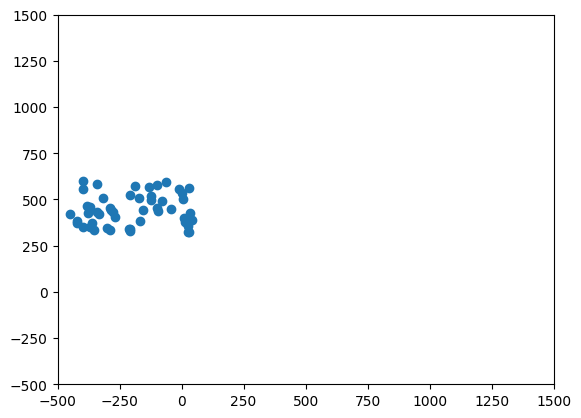

In [1]:
"""
A deliberately bad implementation of [Boids](http://dl.acm.org/citation.cfm?doid=37401.37406)
for use as an exercise on refactoring.
"""

from matplotlib import pyplot as plt
from matplotlib import animation
import random
import yaml

# Deliberately terrible code for teaching purposes

boids_x=[random.uniform(-450,50.0) for x in range(50)]
boids_y=[random.uniform(300.0,600.0) for x in range(50)]
boid_x_velocities=[random.uniform(0,10.0) for x in range(50)]
boid_y_velocities=[random.uniform(-20.0,20.0) for x in range(50)]
boids=(boids_x,boids_y,boid_x_velocities,boid_y_velocities)

def updateBoids(boids):
    xs,ys,xvs,yvs=boids
    deltaXVs=[0]*len(xs)
    deltaYVs=[0]*len(xs)
    # Fly towards the middle
    for i in range(len(xs)):
        for j in range(len(xs)):
            deltaXVs[i]=deltaXVs[i]+(xs[j]-xs[i])*0.01/len(xs)
    for i in range(len(xs)):
        for j in range(len(xs)):
            deltaYVs[i]=deltaYVs[i]+(ys[j]-ys[i])*0.01/len(xs)
    # Fly away from nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 100:
                deltaXVs[i]=deltaXVs[i]+(xs[i]-xs[j])
                deltaYVs[i]=deltaYVs[i]+(ys[i]-ys[j])
    # Try to match speed with nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j]-xs[i])**2 + (ys[j]-ys[i])**2 < 10000:
                deltaXVs[i]=deltaXVs[i]+(xvs[j]-xvs[i])*0.125/len(xs)
                deltaYVs[i]=deltaYVs[i]+(yvs[j]-yvs[i])*0.125/len(xs)
    # Update velocities
    for i in range(len(xs)):
        xvs[i]=xvs[i]+deltaXVs[i]
        yvs[i]=yvs[i]+deltaYVs[i]
    # Move according to velocities
    for i in range(len(xs)):
        xs[i]=xs[i]+xvs[i]
        ys[i]=ys[i]+yvs[i]


figure=plt.figure()
axes=plt.axes(xlim=(-500,1500), ylim=(-500,1500))
scatter=axes.scatter(boids[0],boids[1])

def ANIMATE(frame):
    updateBoids(boids)
    scatter.set_offsets(list(zip(boids[0],boids[1])))


anim = animation.FuncAnimation(figure, ANIMATE,
                               frames=50, interval=50)

if __name__ == "__main__":
    plt.show()

If you go into your folder and run the code:

``` bash
cd bad_boids
python boids.py
```


You should be able to see some birds flying around, and then disappearing as they leave the window, like this:


In [2]:
from IPython.display import HTML

HTML(anim.to_jshtml())

## Regression Test


First, have a look at the regression test we made (in the `record_fixture.py` file).

To create it, we saved out the before and after state
for one iteration of some boids, using ipython:


```python
from copy import deepcopy
import yaml
import boids

before = deepcopy(boids.boids)
boids.updateBoids(boids.boids)
after = boids.boids
fixture = {"before": before, "after": after}
with open("fixture.yml", "w") as fixture_file:
    fixture_file.write(yaml.safe_dump(fixture))
```

### Invoking the test


Then, I used the fixture file to define the test (in `test_boids.py`):


```python
import os
import yaml
from boids import updateBoids
from pytest import approx

def test_bad_boids_regression():
    with open(os.path.join(os.path.dirname(__file__), "fixture.yml")) as fixture_file:
        regression_data = yaml.safe_load(fixture_file)

    boid_data = regression_data["before"]
    updateBoids(boid_data)
    for after, before in zip(regression_data["after"], boid_data):
        for after_value, before_value in zip(after, before):
            assert after_value == approx(before_value)
```

### Make the regression test fail

Check the tests pass:

``` bash
pytest
```

Edit the file to make the test fail, see the fail, then reset it:

```
git checkout boids.py
```

## Your Task

Transform bad boids **gradually** into better code, while making sure it still works, using a refactoring approach.

Each time you make a change:

- Ensure the regression test still passes
- Do a git commit on your fork, and write a commit message explaining the refactoring you did.

Try to keep the changes as small as possible.

If your refactoring creates any units (functions, modules, or classes), **write a unit test** for the unit (it's a good idea to not rely on regression testing).

Don't worry about the performance of the code, that's a topic for the "Programming for Speed" module later.

### Refactoring Ideas

You probably won't have time to do all these in the session, but here are some refactorings we've seen in the module that you can try to apply here. We've loosely ordered them by where we'd suggest starting, but feel free to focus on the ones you're most interested in:

- Use linters to check and enforce a consistent style
- Ensure the code follows PEP8 conventions (e.g. for naming and whitespace)
- Consider whether any of the code "smells" and refactorings from [07_04_refactoring](07_04_refactoring.html) apply here
- Consider whether there is structure in the code that could be refactored into classes (see [07_05_object_oriented_design](07_05_object_oriented_design.html) for ideas)
- Add type annotations

You may also like to apply some of what we've learned in previous modules, for example:

- Ensure dependencies are specified correctly
- Run tests and checks automatically, for example with a GitHub actions workflow
- Improve documentation
- Make the code into a Python package (e.g. see [module06_software_projects/06_04_packaging](../module06_software_projects/06_04_packaging.html#using-setuptools))